# CO2 Concentration in the Atmosphere

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit


The data file weekly_in_situ_co2_mlo.csv is downloaded from https://scrippsco2.ucsd.edu/data/atmospheric_co2/mlo.html. Download date 03/01/2025 14:29.


In [43]:
data = pd.read_csv('weekly_in_situ_co2_mlo.csv', 
                       names = ['date', 'CO2 Concentration ppm'],
                       sep = ',', 
                       skiprows = 44)

In [66]:
data

,date,CO2 Concentration ppm,date2,datetimes,days
0,1958-03-29,316.19,1958-03-29,1958-03-29,0
1,1958-04-05,317.31,1958-04-05,1958-04-05,7
2,1958-04-12,317.69,1958-04-12,1958-04-12,14
3,1958-04-19,317.58,1958-04-19,1958-04-19,21
4,1958-04-26,316.48,1958-04-26,1958-04-26,28
...,...,...,...,...,...
3398,2024-10-12,422.13,2024-10-12,2024-10-12,24304
3399,2024-10-19,422.16,2024-10-19,2024-10-19,24311
3400,2024-10-26,422.36,2024-10-26,2024-10-26,24318
3401,2024-11-02,423.15,2024-11-02,2024-11-02,24325


Lets check for missing data. 

In [45]:
data[raw_data.isnull().any(axis=1)]

,date,CO2 Concentration ppm


So there are no rows with missing data, good! 

Let's make a 2nd column of dates which are datetime objects, for later better usability.

In [54]:
data['datetimes'] = pd.to_datetime(data['date'],format='%Y-%m-%d')

Now lets plot the data:

<Axes: title={'center': 'CO2 Concentration, weekly values'}, xlabel='Date', ylabel='CO2 Concentration /ppm'>

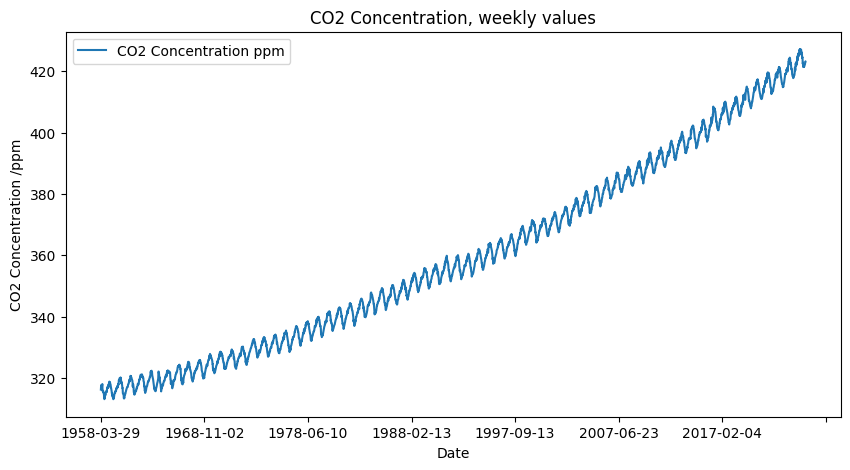

In [55]:
data.plot(x = 'date', y='CO2 Concentration ppm', kind = 'line', title = 'CO2 Concentration, weekly values', ylabel = 'CO2 Concentration /ppm', xlabel = 'Date', figsize = (10, 5))

The plot seems to consist of a superposition of a) a (relatively) short term oscillation and b) a slower long-term development. Let's try to fit a model expressing this. In order to do this, we will need the date to be a variable (x) that is steadily increasing, instead of dates as it is now. We should convert the dates into variable 'days' starting from 0 at first data point summing up to date of last data point.

In [61]:
start = data['datetimes'][0] # set start date

data['days'] = (data['datetimes']-start).dt.days
data.head()

,date,CO2 Concentration ppm,date2,datetimes,days
0,1958-03-29,316.19,1958-03-29,1958-03-29,0
1,1958-04-05,317.31,1958-04-05,1958-04-05,7
2,1958-04-12,317.69,1958-04-12,1958-04-12,14
3,1958-04-19,317.58,1958-04-19,1958-04-19,21
4,1958-04-26,316.48,1958-04-26,1958-04-26,28
...,...,...,...,...,...
3398,2024-10-12,422.13,2024-10-12,2024-10-12,24304
3399,2024-10-19,422.16,2024-10-19,2024-10-19,24311
3400,2024-10-26,422.36,2024-10-26,2024-10-26,24318
3401,2024-11-02,423.15,2024-11-02,2024-11-02,24325


To characterise the oscillating function, we can look at shorter timespans to rid the long-term evolution from having an effect. Lets look at the 1st year:

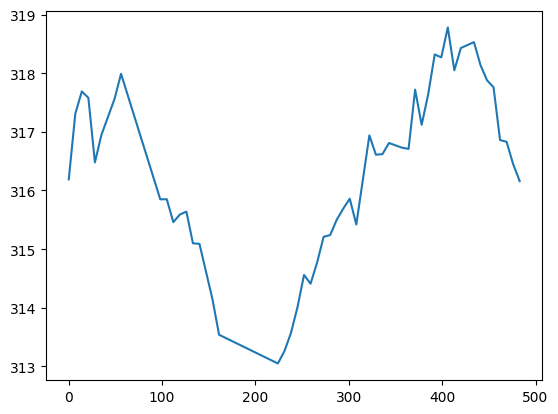

In [67]:
X = data['days'][0:52]
Y = data['CO2 Concentration ppm'][0:52]
plt.plot(X, Y)

Why is the first 52 weeks containing almost 500 days? Should contain exactly 356 days, something is clearly wrong.